In [1]:
# importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 4 numerical features : ['age', 'bmi', 'children', 'expenses']

We have 3 categorical features : ['sex', 'smoker', 'region']


In [7]:
#Checking missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### Dataset summary:
1. Dataset contains 7 columns out of which 2 are numerical and 4 are of categorical type and one is our target columnn for prediction which is continuos(expenses). 
2. There are total 1338 records present
3. No missing values are present in dataset

### Univariate Analysis 
#### For Numerical columns;

#### Age

In [8]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


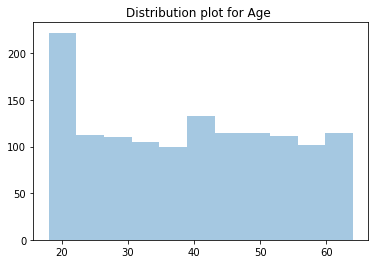

In [9]:
sns.distplot(x=df['age'],kde=False)
plt.title("Distribution plot for Age ")
plt.show()

<AxesSubplot:>

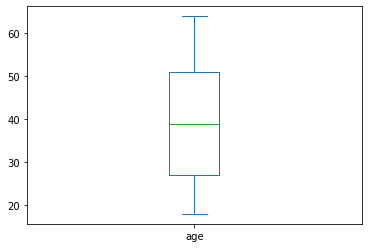

In [10]:
df['age'].plot(kind='box')


#### Findings:
1. The variable age is Uniformally distributed from 18 to 64
2. There are no outliers present in data

#### bmi       

In [11]:
df['bmi'].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


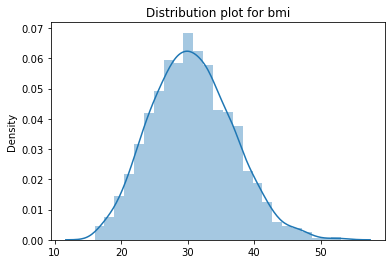

In [12]:
sns.distplot(x=df['bmi'],kde=True)
plt.title('Distribution plot for bmi')
plt.show()

In [13]:
df['bmi'].skew()

0.28459296016731195

<AxesSubplot:xlabel='bmi'>

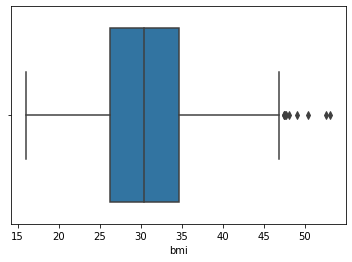

In [14]:
sns.boxplot(x=df['bmi'],data=df)

In [15]:
mean = 30.67
std = 6.1

lower = mean - 3*std
print('lower:',lower)
upper = mean + 3*std
print('upper:',upper)

lower: 12.370000000000005
upper: 48.97


In [16]:
#applying z-score method
df[(df['bmi'] <lower ) | (df['bmi'] > upper)]

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
847,23,male,50.4,1,no,southeast,2438.06
1047,22,male,52.6,1,yes,southeast,44501.40
1317,18,male,53.1,0,no,southeast,1163.46


#### Findings:
1. Variable age is normally distributed
2. There are some outliers 

In [17]:
df.children.describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

#### 2.  Categorical variables

In [18]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

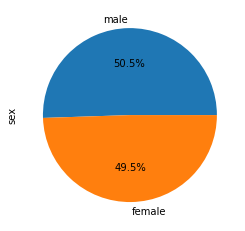

In [19]:
df['sex'].value_counts().plot(kind='pie',autopct='%0.1f%%')

In [20]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

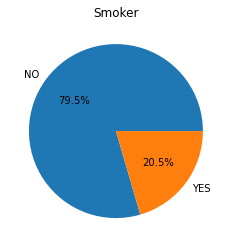

In [21]:
plt.pie(df['smoker'].value_counts(),autopct='%0.1f%%',labels=['NO','YES'])
plt.title('Smoker')
plt.show()

In [22]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

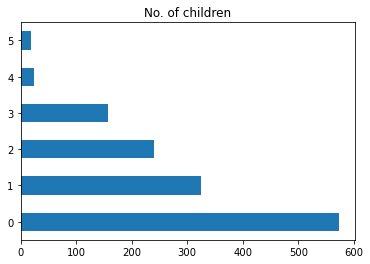

In [23]:
df['children'].value_counts().plot(kind='barh')
plt.title('No. of children')
plt.show()

In [24]:
# df[(df['sex']=='male') & (df['children'] !=0)]

In [25]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<AxesSubplot:ylabel='region'>

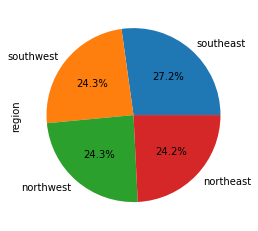

In [26]:
df['region'].value_counts().plot(kind='pie',autopct='%0.1f%%',)

#### Findings:
1. Dataset contains equal number of male and feamles
2. 80% of people are non-smokers
3. Number of people who do not have any child is highest among all and those with 5 children are lowest
4. People are distributed approximately equal across all regions 

### Bivariate Analysis

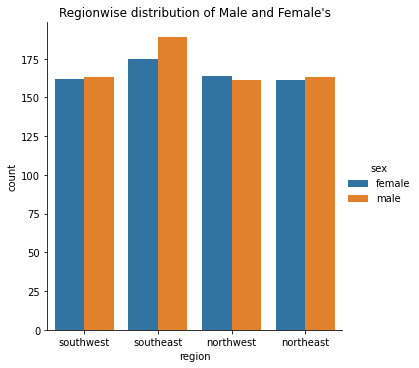

In [27]:
sns.catplot(data=df,x='region',hue='sex',kind='count')
plt.title("Regionwise distribution of Male and Female's")
plt.show()

Conclusion: It seems that proportion of male's and female's is approx. equal for each region. Also we can see that southeast region contains  highest no. of male's and female's

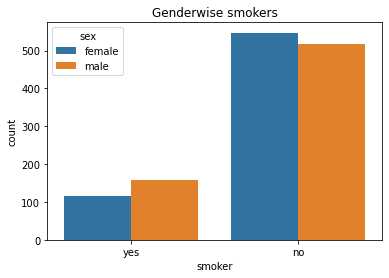

In [28]:
sns.countplot(data=df,x='smoker',hue='sex')
plt.title('Genderwise smokers')
plt.show()

Conclusion: Propertion of male smokers is greater than feamale's

In [29]:
pd.crosstab(index=df['children'],columns=df['smoker'])

smoker,no,yes
children,,
0,459,115
1,263,61
2,185,55
3,118,39
4,22,3
5,17,1


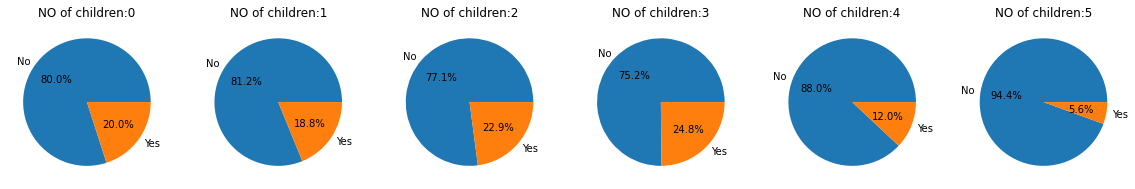

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=6,figsize=(20,20))
for i in sorted(df['children'].unique()):
#         print("NO of children:",i,'\n')
        ax[i].pie(df['smoker'][df['children']==i].value_counts() ,autopct='%0.1f%%',labels=["No","Yes"])
        ax[i].set_title(f"NO of children:{i}")

#### Conclusion: It seems  that people with more than 3 children are less likely to smoke

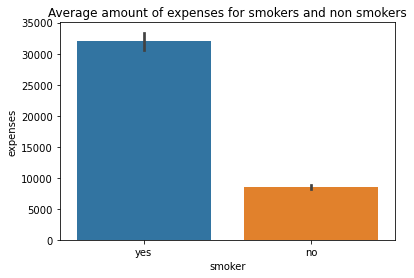

In [31]:
sns.barplot(x=df['smoker'],y=df['expenses'])
plt.title('Average amount of expenses for smokers and non smokers')
plt.show()

Conclusion: People who smokes have higher mean expenses  than non-smokers 

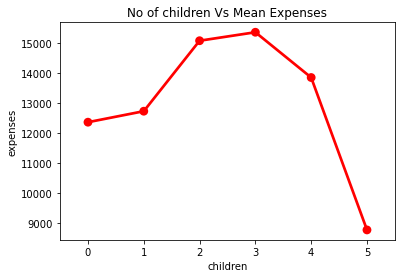

In [32]:
sns.pointplot(x=df['children'],y=df['expenses'],ci=None,color='red')
plt.title("No of children Vs Mean Expenses")
plt.show()


Conclusion: Surprisingly People with 5 children have lowest mean expenses

C:\Users\DKG\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


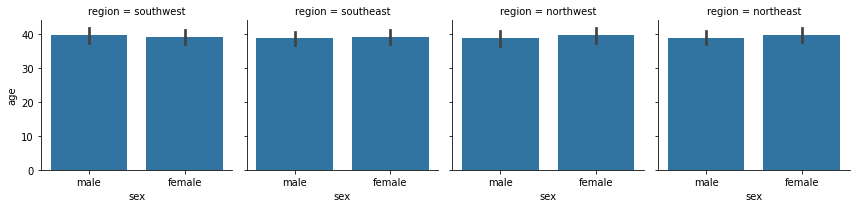

In [33]:
fct = sns.FacetGrid(data=df,col='region',)
fct.map(sns.barplot,'sex','age')
plt.show()

Conclusion: Average age for Male and Female is same for across all regions.

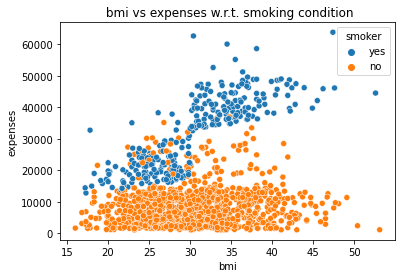

In [34]:
sns.scatterplot(data=df,x='bmi',y='expenses',hue='smoker')
plt.title(" bmi vs expenses w.r.t. smoking condition")
plt.show()

### Conclusion:
we can see that expenses increases with bmi for smokers

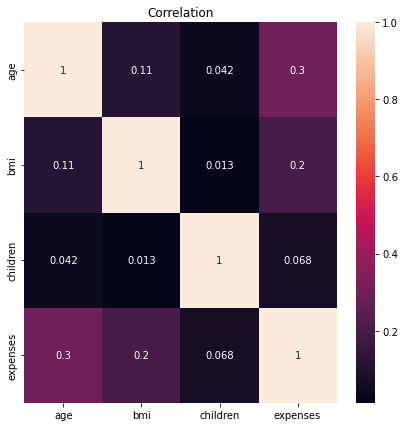

In [35]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)
plt.title("Correlation")
plt.show()

Conclusion: There is No strong dependancy exists between any columns

###  Data Preprocessing  & Feature Engineering

In [36]:
#importing packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer


In [37]:
#splitting dataset into input,output
input_df = df.drop(columns='expenses')
input_df

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [38]:
output_df = df.loc[:,['expenses']]
output_df

,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86
...,...
1333,10600.55
1334,2205.98
1335,1629.83
1336,2007.95


In [39]:
categorical_features

['sex', 'smoker', 'region']

In [40]:
df[categorical_features].nunique()

sex       2
smoker    2
region    4
dtype: int64

In [41]:
#splitting the dataset into train and test data
input_train,input_test,target_train,target_test=train_test_split(input_df,output_df,test_size=0.2,random_state=19)

In [42]:
input_train

,age,sex,bmi,children,smoker,region
1020,51,male,37.0,0,no,southwest
1040,35,female,28.0,0,yes,northwest
1321,62,male,26.7,0,yes,northeast
896,43,female,20.0,2,yes,northeast
1063,36,male,28.6,3,no,northwest
...,...,...,...,...,...,...
308,58,male,34.9,0,no,northeast
1043,28,female,25.8,0,no,southwest
936,44,male,29.7,2,no,northeast
757,47,female,27.8,0,yes,southeast


In [43]:
input_train.shape

(1070, 6)

In [44]:
target_train

,expenses
1020,8798.59
1040,20234.85
1321,28101.33
896,19798.05
1063,6548.20
...,...
308,11944.59
1043,3161.45
936,32108.66
757,23065.42


In [45]:
target_train.shape

(1070, 1)

#### Applying transformations

In [46]:
numeric_features =['age', 'bmi']
categorical_features =['sex', 'smoker', 'region']

In [47]:
transformer = ColumnTransformer(
                transformers=[
                    ('trf1',OneHotEncoder(sparse=False,handle_unknown='ignore'),categorical_features),
                    ('trf2',StandardScaler(),numeric_features),
                             ],remainder='passthrough'
                                )

In [93]:
train_array = np.c_[ transformer.fit_transform(input_train),target_train]
test_array = np.c_[transformer.transform(input_test),target_test]

In [95]:
train_array.shape

(1070, 12)

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score


In [162]:
models = {     
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Linear Regression": LinearRegression(),
    "XGBRegressor": XGBRegressor(),
            }

In [158]:
params={
    "Decision Tree": {
        # 'splitter':['best','random'],
        'max_features':['sqrt','log2'],
    },
    "Random Forest":{
        # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],

        # 'max_features':['sqrt','log2',None],
        'n_estimators': [8,16,32,64,128,256]
    },
    "Linear Regression":{},
    
    "XGBRegressor":{
        'learning_rate':[.1,.01,.05,.001],
        'n_estimators': [8,16,32,64,128,256]
    }
    
}

In [159]:
X_train,y_train,X_test,y_test=(
                train_array[:,:-1],
                train_array[:,-1],
                test_array[:,:-1],
                test_array[:,-1]
            )

In [172]:
from sklearn.model_selection import GridSearchCV
def get_best_model(X_train,y_train,X_test,y_test,model_dict,params_,base_accuracy=0.7):
    models = model_dict.keys()
    for model in models:
        print(f'Initial base accuracy is {base_accuracy}')
        print(20*'*',"Estimator: ",model,20*'*')
        gs = GridSearchCV(estimator=model_dict[model],param_grid=params_[model],cv=3)
        gs.fit(X_train,y_train)
        print(f'Best parameters are :{gs.best_params_} With R2 score:{gs.best_score_}')
        
        regressor = model_dict[model].set_params(**gs.best_params_)
        regressor.fit(X_train,y_train)

        y_train_pred = regressor.predict(X_train)
        y_test_pred = regressor.predict(X_test)
        
        train_model_score = r2_score(y_train, y_train_pred)

        test_model_score = r2_score(y_test, y_test_pred)
        
        if test_model_score >= base_accuracy:
            print('Acceptabel model found!')
            base_accuracy = test_model_score
            best_model = {model:regressor}
        
        else:
            print('Model rejected\n',30*'__')
            
    
    print(f"Best model is:{list(best_model.keys())} with R2 Score: {round(test_model_score,2)}")        
    return best_model
            


    
    


In [173]:
get_best_model(X_train,y_train,X_test,y_test,model_dict=models,params_=params)

Initial base accuracy is 0.7
******************** Estimator:  Random Forest ********************
Best parameters are :{'n_estimators': 128} With R2 score:0.8321723213812436
Acceptabel model found!
Initial base accuracy is 0.8640230655629796
******************** Estimator:  Decision Tree ********************
Best parameters are :{'max_features': 'log2'} With R2 score:0.6607091627188528
Model rejected
 ____________________________________________________________
Initial base accuracy is 0.8640230655629796
******************** Estimator:  Linear Regression ********************
Best parameters are :{} With R2 score:0.7467608968207348
Model rejected
 ____________________________________________________________
Initial base accuracy is 0.8640230655629796
******************** Estimator:  XGBRegressor ********************
Best parameters are :{'learning_rate': 0.05, 'n_estimators': 64} With R2 score:0.8349934319786455
Acceptabel model found!
Best model is:['XGBRegressor'] with Accuracy: 0.8710

{'XGBRegressor': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=64, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)}

### Conclusion: WE can see 'XGBRegressor is best model with r2 score :87%